# Лабораторная работа № 5. Часть 1. Модель решающих деревьев

In [450]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import graphviz 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn import metrics
from sklearn import datasets

In [451]:
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [452]:
train, test = train_test_split(df, test_size=0.2)

feats = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

X_train = train[feats]
Y_train = train[['Outcome']]

X_test = test[feats]
Y_test = test[['Outcome']]

Логистическая регрессия

In [453]:
model1 = LogisticRegression(max_iter=1000)

model1.fit(X_train, Y_train.values[:, 0])

Y_pred1 = model1.predict(X_test)

Метрики

In [454]:
metrics.accuracy_score(Y_test, Y_pred1)

0.7857142857142857

In [455]:
metrics.f1_score(Y_test, Y_pred1)

0.5714285714285714

In [456]:
metrics.precision_score(Y_test, Y_pred1)

0.6470588235294118

In [457]:
metrics.recall_score(Y_test, Y_pred1)

0.5116279069767442

Решающие деревья

In [458]:
model2 = DecisionTreeClassifier()

model2.fit(X_train, Y_train)

Y_pred2 = model2.predict(X_test)

Метрики

In [459]:
metrics.accuracy_score(Y_test, Y_pred2)

0.7272727272727273

In [460]:
metrics.f1_score(Y_test, Y_pred2)

0.5333333333333333

In [461]:
metrics.precision_score(Y_test, Y_pred2)

0.5106382978723404

In [462]:
metrics.recall_score(Y_test, Y_pred2)

0.5581395348837209

Были применены следующие метрики:

1. accuracy_score - сравнивает точность предсказаний с реальными данными
2. precision_score - способность модели не помечать истинно отрицательные данные как истинно положительные
3. recall_score - способность модели находить все истинно положительные данные
4. f1_score - среднее precision_score и recall_score

По их результатам можно сделать вывод, что модель логистической регрессии лучше подходит для данного датасета, чем модель решающих деревьев

Исследуем значение метрики f1_score (т.к. она как мне кажется наилучшим образом отражает в данной ситуации точность модели за счёт учитывания precision и recall одновременно) в зависимости от глубины дерева

In [463]:
depths = range(1, 21)
f1_scores = []
best_depth, best_score = 1, 0

for depth in depths:
    model = DecisionTreeClassifier(max_depth=depth)
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    
    f1 = metrics.f1_score(Y_test, Y_pred)

    if f1 > best_score:
        best_score = f1
        best_depth = depth
    
    f1_scores.append(f1)

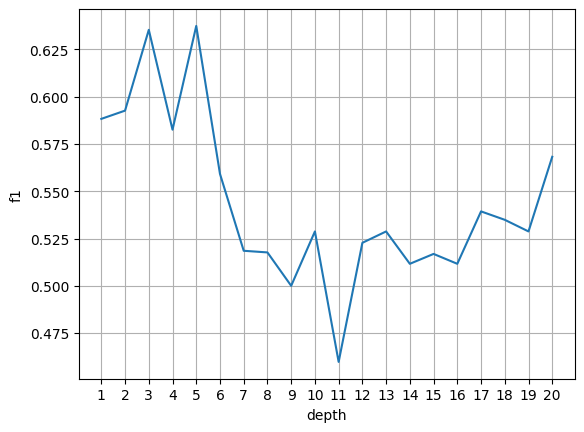

In [464]:
ax = plt.subplot()
ax.plot(depths, f1_scores)
ax.set_xlabel("depth")
ax.set_xticks(depths)
ax.grid(visible=True)
ax.set_ylabel("f1")
plt.show()

Из графика сразу видно наилучшую глубину дерева, т.к. у неё будет наивысшее значение f1

Создаём оптимальную модель

In [465]:
optimal_model = DecisionTreeClassifier(max_depth=best_depth)

optimal_model.fit(X_train, Y_train)

Y_pred = optimal_model.predict(X_test)

График дерева

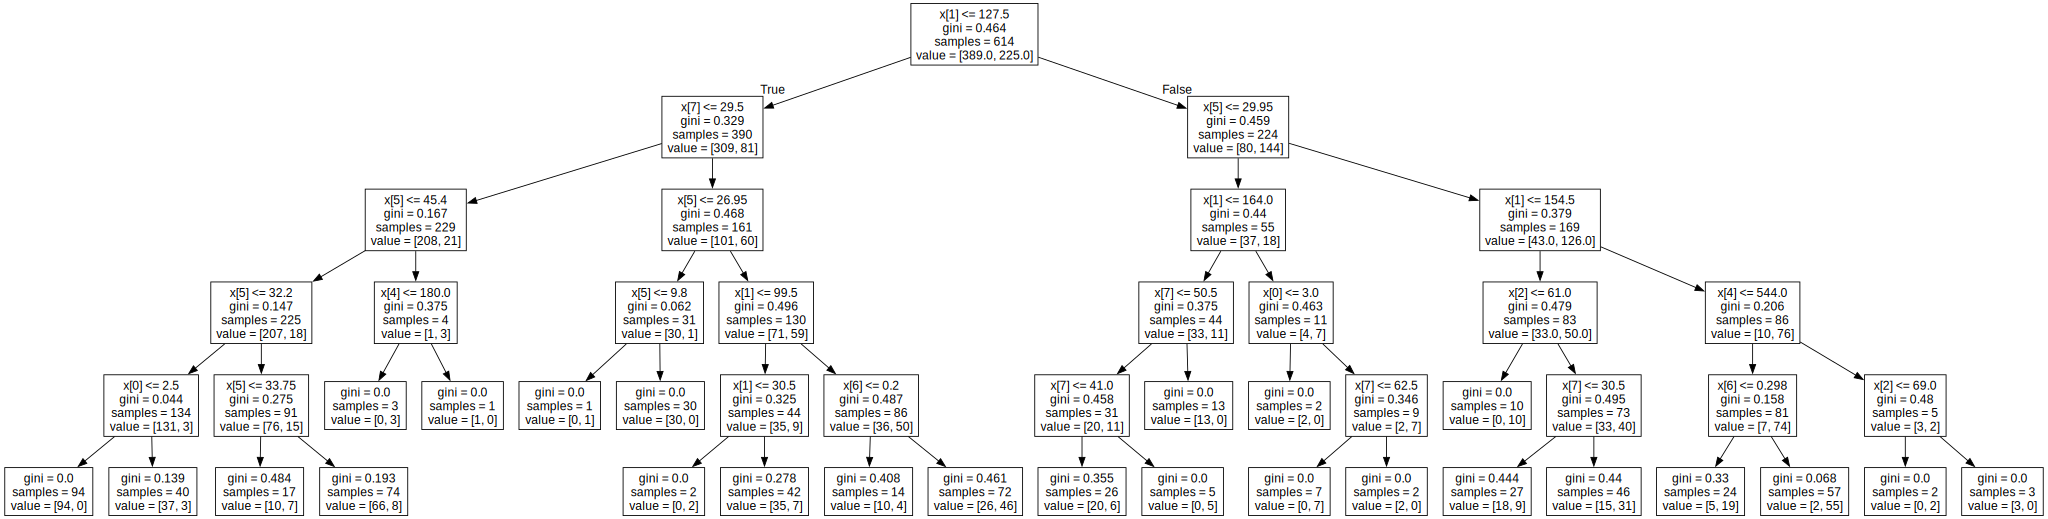

In [466]:
dots = export_graphviz(optimal_model, out_file=None)
graph = graphviz.Source(dots) 
graph

Важность признаков

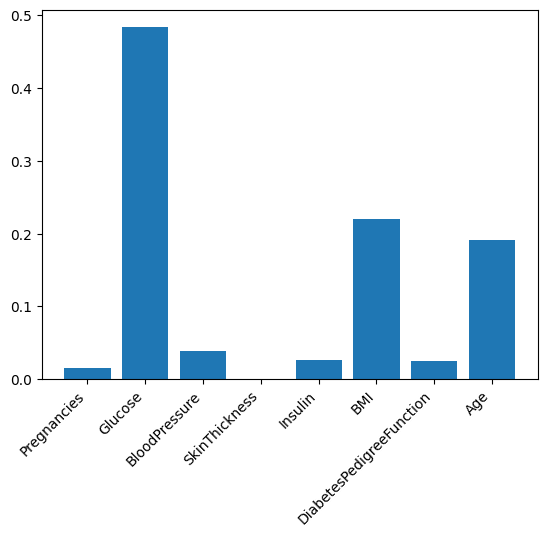

In [467]:
importance = optimal_model.feature_importances_.tolist()

plt.bar(feats, importance)
plt.xticks(rotation=45, ha='right')
plt.show()

PR кривая

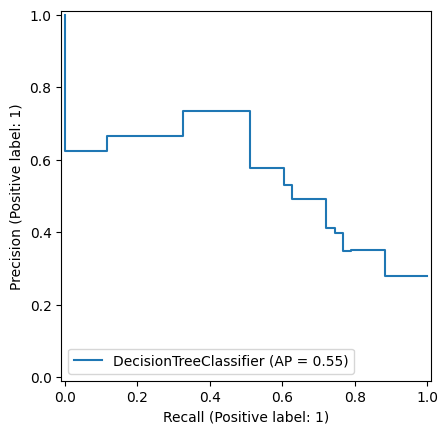

In [468]:
metrics.PrecisionRecallDisplay.from_estimator(optimal_model, X_test, Y_test)
plt.show()

ROC кривая

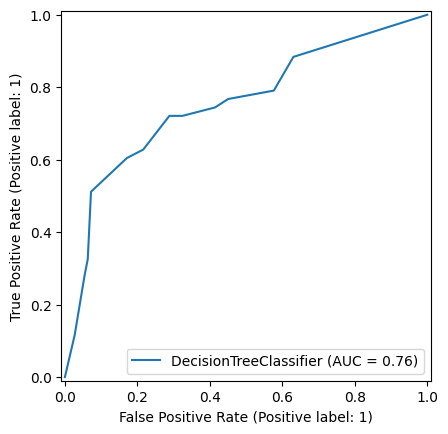

In [469]:
metrics.RocCurveDisplay.from_estimator(optimal_model, X_test, Y_test)
plt.show()

График метрики относительно max_features

In [470]:
f1_scores = []
best_featnum, best_score = 1, 0
featnums = range(1, len(feats)+1)

for featnum in featnums:
    model = DecisionTreeClassifier(max_features=featnum)
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    
    f1 = metrics.f1_score(Y_test, Y_pred)

    if f1 > best_score:
        best_score = f1
        best_depth = depth
    
    f1_scores.append(f1)

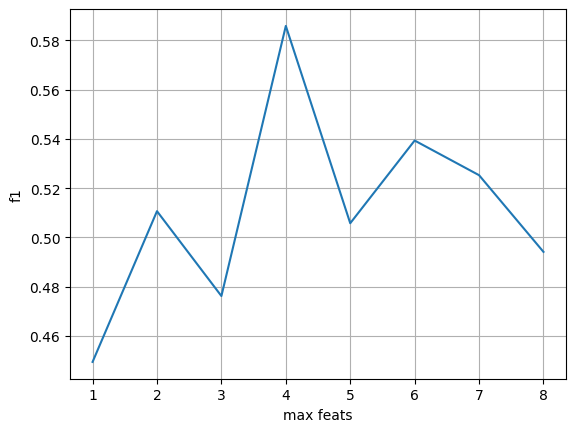

In [471]:
ax = plt.subplot()
ax.plot(featnums, f1_scores)
ax.set_xlabel("max feats")
ax.set_xticks(featnums)
ax.grid(visible=True)
ax.set_ylabel("f1")
plt.show()